In [1]:
import numpy as np 
import pandas as pd
import pylab as plt
import scipy.io as sio

# Read in .mat file 
path = '/Users/ananth/Desktop/bas_scripts/DATA_SETS/mosaic/newdata_with_metcity/'

# Read in .mat file
data = sio.loadmat(path + 'U1104_8cm_1min.mat')

# display the variables and their type in data
for key in data.keys():
    if type(data[key]) == np.ndarray:
        print(key, data[key].shape)

# Extract the variables
#time = data['time']

A (1, 1)
F (277920, 64)
MU (277920, 1)
N (277920, 64)
Ntot (277920, 1)
Q (277920, 1)
Qi (277920, 1)
RH10m (352800, 1)
RH2m (352800, 1)
RH6m (352800, 1)
SP_data (277920, 64)
T (277920, 1)
T10m (352800, 1)
T10m_ex (277920, 1)
T29m_PS (357660, 2)
T2m (352800, 1)
T6m (352800, 1)
U10m (352800, 1)
U10m_ex (277920, 1)
U2m (352800, 1)
U39m_PS (357660, 2)
U6m (352800, 1)
U8cm_ex (277920, 1)
dp_bins (64, 4)
filename (1,)
fname (193,)
jday (277920, 1)
lat (352800, 1)
lon (352800, 1)
meanD (64, 1)
mu (277920, 64)
p (352800, 1)
q (277920, 64)
rho_ice (1, 1)
snow_depth (352800, 1)
t (277920, 1)
t_NOAA (352800, 1)
__function_workspace__ (1, 2224360)


In [10]:
data['U10m_ex'].shape

(277920, 1)

In [2]:
# product using python
N_a = data['N']
dp_a = data['dp_bins'][:,0]

sum_a1 = np.nansum(N_a*dp_a, axis=1)
sum_b1 = np.nansum(N_a, axis=1)
dp_mean1 = sum_a1/sum_b1



/Users/ananth/miniconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [3]:
# 64 partile size bins 
x = data['dp_bins'][:,2].T
bin_width = data['dp_bins'][:,3].T

# remove top and bottom bin, random particle detection data 

# convert element in nupy array to masked
x = np.ma.masked_array(x)
bin_width = np.ma.masked_array(bin_width)
x[0] = np.ma.masked
x[len(x)-1] = np.ma.masked

bin_width[0] = np.ma.masked
bin_width[len(bin_width)-1] = np.ma.masked




#x[len(x)] = []
#bin_width[0], bin_width[len(bin_width)] = [],[]


shape of N (277920, 64)
shape of U10 (277920, 1)
shape of flag before broadcasting (277920, 1)
shape of flag after broadcasting (277920, 64)


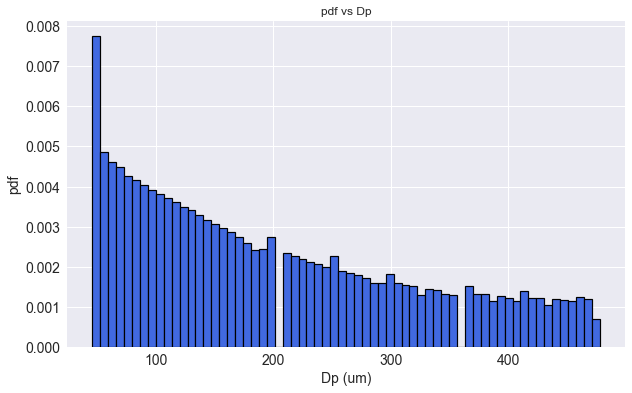

In [22]:
plt.style.use('seaborn')
velocity_bin = np.ma.masked_array(np.array([8,9]))

# mask every element in N where U10m is not between 0 and 5 m/s

N = np.ma.masked_array(data['N'])

U10m = data['U10m_ex']
U10m = np.ma.masked_array(U10m)

print('shape of N', N.shape)
print('shape of U10', U10m.shape)

flag1 = (U10m < velocity_bin[0])
flag2 = (U10m > velocity_bin[1])

#array of elemts where flag1 and flag2 are true
flag = flag1 & flag2
print('shape of flag before broadcasting', flag.shape)
# broadcast and make flag the same shape as N
flag = np.broadcast_to(flag, N.shape)
print('shape of flag after broadcasting', flag.shape)


#N_slice = N[:,0]
N_slice = np.ma.masked_array(N, mask=flag)

# mask every element in N where U10m is not between 0 and 5 m/s
N_mean = np.nanmean(N_slice,axis = 0)

#N_mean = np.ma.masked_array(N_mean)
N_mean[0] = np.ma.masked
N_mean[len(N_mean)-1] = np.ma.masked

N_sum = np.nansum(N_mean)
pdf = N_mean/(bin_width*N_sum)

# mask elements pf pdf where pdf is Nan or zero
pdf = np.ma.masked_array(pdf)
pdf[pdf == 0] = np.ma.masked
pdf[pdf == np.nan] = np.ma.masked

# plot a same plot as above but a histogram 
plt.figure(figsize=(10,6))
plt.hist(x, bins=64, weights=pdf,color='royalblue',edgecolor='black', linewidth=1.2)
plt.xlabel('Dp (um)',fontsize=14)
plt.ylabel('pdf',fontsize=14)
plt.title('pdf vs Dp')
#make xticks and yticks a larger font
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()




In [23]:
N_slice.shape

(277920, 64)

In [30]:
N_mean.shape

(64,)

In [9]:
x.shape

(64,)

In [31]:
pdf.shape

(64,)

In [13]:
N_mean.shape

(1,)

In [6]:
flag.shape

(277920, 64)

In [14]:
test = flag[:,0] == flag[:,53]

In [15]:
test[test==False]

array([], dtype=bool)

In [18]:
test2 = N == N_slice

In [21]:
test2[test2==False]

masked_array(data=[False, False, False, ..., False, False, False],
             mask=False,
       fill_value=True)